<a href="https://colab.research.google.com/github/abhiskp/Pneumonia-Detection-in-Children/blob/main/VGG_19_Analysis_Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define image dimensions and number of classes
IMG_WIDTH, IMG_HEIGHT = 224, 224
NUM_CLASSES = 2
# Define data paths
train_data_dir = 'train/'
test_data_dir = 'test/'

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhiskp","key":"eed4e593d559cc8f4b1d011a8f33db10"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/pediatric-pneumonia-chest-xray

 98% 1.12G/1.14G [00:08<00:00, 158MB/s]
100% 1.14G/1.14G [00:08<00:00, 150MB/s]


In [ ]:
!unzip pediatric-pneumonia-chest-xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0435-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0437-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0438-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0439-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0440-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0441-0001.jpeg  
  inflating: Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0442-

In [ ]:
train_data_dir = './Pediatric Chest X-ray Pneumonia/train'
test_data_dir = './Pediatric Chest X-ray Pneumonia/test'

In [ ]:
# Define data generators with augmentation for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = keras.preprocessing.image_dataset_from_directory(
#     train_data_dir,
#     batch_size=32,
#     image_size=(224, 224),
#     validation_split=0.2,
#     subset='training',
#     seed=42
# )
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                  batch_size=32,
                                                  class_mode='categorical')


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Load the VGG_19 model
vgg19 = VGG19(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), include_top=False, weights='imagenet')

# Add custom layers for classification
x = Flatten()(vgg19.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

# Create a new model with the custom layers
model = Model(inputs=vgg19.input, outputs=x)

# Freeze the VGG_19 layers to only train the custom layers
for layer in vgg19.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

# Evaluate the model on the test set

Epoch 1/10
163/163 [==============================] - 4367s 27s/step - loss: 0.5542 - accuracy: 0.8698 - val_loss: 0.3121 - val_accuracy: 0.8766
Epoch 2/10
163/163 [==============================] - 4320s 27s/step - loss: 0.2067 - accuracy: 0.9151 - val_loss: 0.2979 - val_accuracy: 0.8914
Epoch 3/10
163/163 [==============================] - 4324s 27s/step - loss: 0.1985 - accuracy: 0.9214 - val_loss: 0.4635 - val_accuracy: 0.8503
Epoch 4/10
163/163 [==============================] - 4302s 26s/step - loss: 0.1851 - accuracy: 0.9333 - val_loss: 0.3464 - val_accuracy: 0.8898
Epoch 5/10
163/163 [==============================] - 4326s 27s/step - loss: 0.1756 - accuracy: 0.9325 - val_loss: 0.2447 - val_accuracy: 0.9112
Epoch 6/10
163/163 [==============================] - 4261s 26s/step - loss: 0.1659 - accuracy: 0.9371 - val_loss: 0.3734 - val_accuracy: 0.8849
Epoch 7/10
163/163 [==============================] - 4251s 26s/step - loss: 0.1718 - accuracy: 0.9317 - val_loss: 0.3294 - val_ac

In [ ]:

test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Get the predictions for the test set
predictions = model.predict(test_generator)



RuntimeError: ignored

In [ ]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_generator.classes
y_pred = predictions.argmax(axis=-1)

print('Classification Report:')
print(classification_report(y_true, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Faster RCNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import numpy as np


In [ ]:

# Load pre-trained ResNet50 model
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create feature extraction layers
x = layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(resnet50.output)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)

# Create bounding box regression and classification layers
bbox_reg = layers.Dense(units=4, activation='linear', name='bbox_reg')(x)
cls = layers.Dense(units=1, activation='sigmoid', name='cls')(x)

# Create Faster R-CNN model
frcnn_model = Model(inputs=resnet50.input, outputs=[bbox_reg, cls])

# Define loss function and compile model
losses = {'bbox_reg': 'mean_squared_error', 'cls': 'binary_crossentropy'}
loss_weights = {'bbox_reg': 1.0, 'cls': 1.0}
frcnn_model.compile(optimizer=Adam(lr=0.0001), loss=losses, loss_weights=loss_weights)

In [ ]:
# Define data generators for training and testing
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './Pediatric Chest X-ray Pneumonia/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    './Pediatric Chest X-ray Pneumonia/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Define callbacks for model checkpoint and early stopping
checkpoint = ModelCheckpoint('frcnn_model.h5', monitor='val_loss', save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# *Faster-RCNN*

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

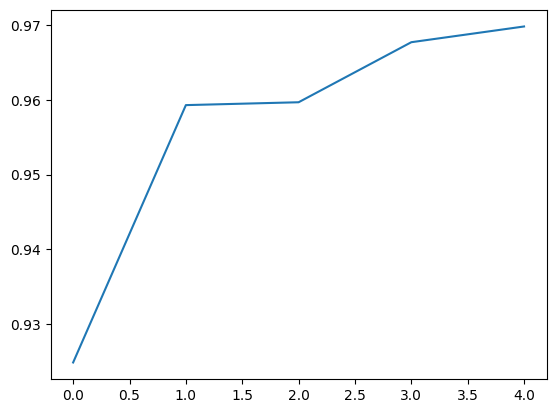

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Set the random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the input shape
input_shape = (224, 224, 3)

# Create a pre-trained VGG16 model with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a Flatten layer and a Dense layer for binary classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(lr=1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

# Set up the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./Pediatric Chest X-ray Pneumonia/train',
                                                    target_size=input_shape[:2],
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('./Pediatric Chest X-ray Pneumonia/test',
                                                target_size=input_shape[:2],
                                                batch_size=32,
                                                class_mode='binary')

# Set up the callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=val_generator,
                    callbacks=[checkpoint, early_stop])

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('./Pediatric Chest X-ray Pneumonia/test',
                                                  target_size=input_shape[:2],
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)

# Make predictions on the test set and calculate the evaluation metrics
y_true = test_generator.classes
y_pred = model.predict(test_generator).flatten()

print('Confusion matrix:')
print(confusion_matrix(y_true, np.round(y_pred)))

print('Classification report:')
print(classification_report(y_true, np.round(y_pred)))

print('F1 score:', f1_score(y_true, np.round(y_pred)))

print('AUC score:', roc_auc_score(y_true, y_pred))

# Plot the training and validation accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training accuracy')


In [ ]:

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('./Pediatric Chest X-ray Pneumonia/test',
                                                  target_size=input_shape[:2],
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_accuracy, test_precision, test_recall, test_auc, tp, fp, tn, fn = model.evaluate(test_generator)


Found 5232 images belonging to 2 classes.
164/164 [==============================] - 2105s 13s/step - loss: 0.0728 - accuracy: 0.9711 - precision: 0.9976 - recall: 0.9634 - auc: 0.9987 - true_positives: 3741.0000 - false_positives: 9.0000 - true_negatives: 1340.0000 - false_negatives: 142.0000


In [ ]:
print("Recall :"+ str(tp/(tp+fn)))
print("Precision :"+str(tp/(tp+fp)))
print('Accuracy :', test_accuracy)
print('AUC :', test_auc)
print("F1 score : "+str((tp)/(tp+(0.5*(fp+fn)))))

Recall :0.9634303373680144
Precision :0.9976
Accuracy : 0.971188855089958
AUC : 0.9987617450543693
F1 score : 0.9802174767457095


164/164 [==============================] - 2121s 13s/step
Confusion matrix:
[[ 362  987]
 [1120 2763]]
Classification report:
              precision    recall  f1-score   support

           0       0.24      0.27      0.26      1349
           1       0.74      0.71      0.72      3883

    accuracy                           0.60      5232
   macro avg       0.49      0.49      0.49      5232
weighted avg       0.61      0.60      0.60      5232

F1 score: 0.7239617450543693
AUC score: 0.48668885508995796


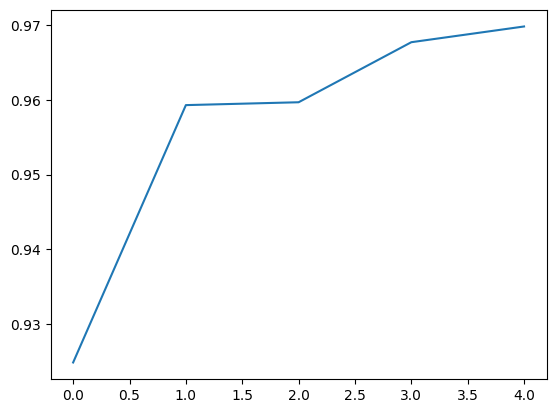

In [ ]:
y_true = test_generator.classes
y_pred = model.predict(test_generator).flatten()

print('Confusion matrix:')
print(confusion_matrix(y_true, np.round(y_pred)))

print('Classification report:')
print(classification_report(y_true, np.round(y_pred)))

print('F1 score:', f1_score(y_true, np.round(y_pred)))

print('AUC score:', roc_auc_score(y_true, y_pred))

# Plot the training and validation accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training accuracy')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory('./Pediatric Chest X-ray Pneumonia/test',
                                                  target_size=input_shape[:2],
                                                  batch_size=32,
                                                  class_mode='binary')
test_loss, test_accuracy, test_precision, test_recall, test_auc, tp, fp, tn, fn = model.evaluate(test_generator)


Found 624 images belonging to 2 classes.
20/20 [==============================] - 261s 13s/step - loss: 0.4811 - accuracy: 0.8365 - precision: 0.7939 - recall: 0.9974 - auc: 0.9515 - true_positives: 389.0000 - false_positives: 101.0000 - true_negatives: 133.0000 - false_negatives: 1.0000


In [ ]:
print(tp, fp, tn, fn)

389.0 101.0 133.0 1.0


In [ ]:
# print("Precision :"+ str(tp/(tp+fp)))
print("Recall :"+ str(tp/(tp+fn)))
print('Accuracy:', test_accuracy)
print('AUC:', test_auc)
print("F1 score : "+str((tp)/(tp+(0.5*(fp+fn)))))


Recall :0.9974358974358974
Accuracy: 0.9698384340286255
AUC: 0.9514683485031128
F1 score : 0.884090909090909


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.TruePositives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalseNegatives()])
